In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
happyness=pd.read_csv('happyness_score.csv')
happyness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
happyness.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
happyness.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df=pd.DataFrame(data=happyness)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

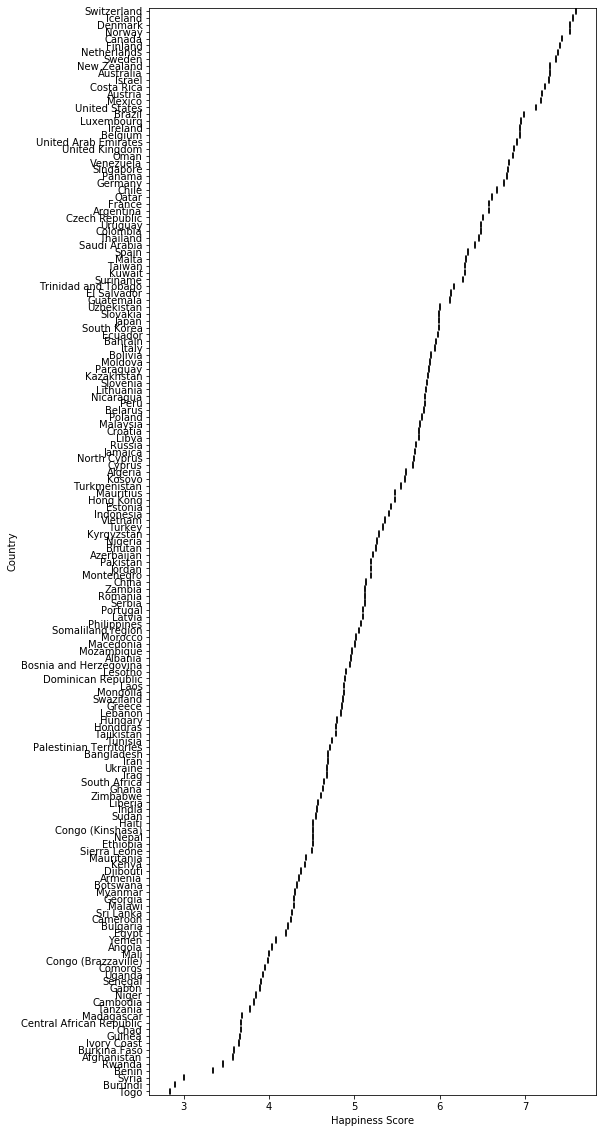

In [8]:
plt.figure(figsize=(8,20))
sns.boxplot(x='Happiness Score',y='Country',data=df,palette='BuGn')

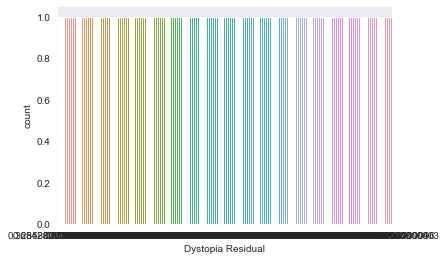

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='Dystopia Residual',data=df)

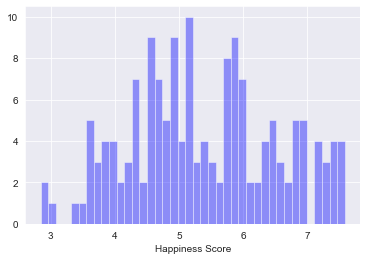

In [10]:
sns.distplot(df['Happiness Score'],kde=False,color='Blue',bins=40)

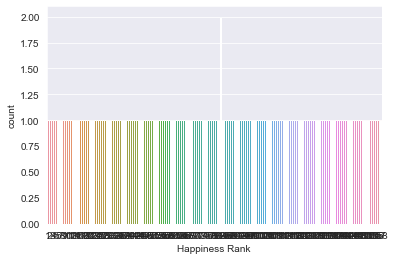

In [11]:
sns.countplot(x='Happiness Rank',data=df)

In [12]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [13]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [14]:
len(df['Country'].unique())

158

In [15]:
df['Country'].value_counts()

Latvia           1
Saudi Arabia     1
Swaziland        1
Malta            1
Honduras         1
                ..
Uzbekistan       1
United States    1
Israel           1
Burundi          1
Indonesia        1
Name: Country, Length: 158, dtype: int64

In [16]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [17]:
eastern_asia=df[df['Region']=='Eastern Asia']

In [18]:
h_score=eastern_asia.tail()

In [19]:
h_score

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
83,China,Eastern Asia,84,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040
99,Mongolia,Eastern Asia,100,4.874,0.03313,0.82819,1.30060,0.60268,0.43626,0.02666,0.33230,1.34759


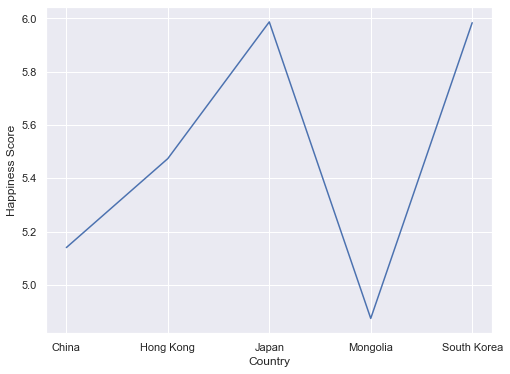

In [20]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(x='Country',y='Happiness Score',data=h_score)
plt.show()

In [21]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [22]:
#sns.swarmplot?

In [23]:
#sns.stripplot?

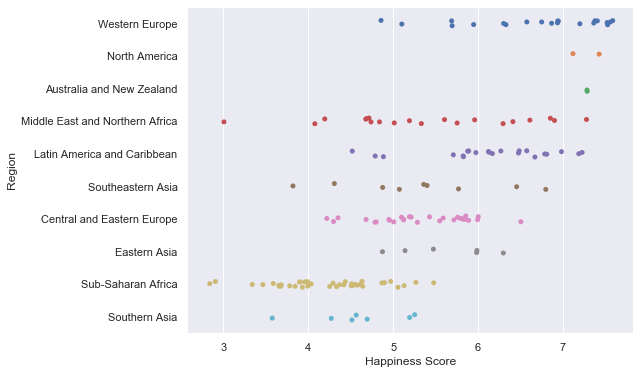

In [24]:
sns.stripplot(y='Region',x='Happiness Score',data=df)

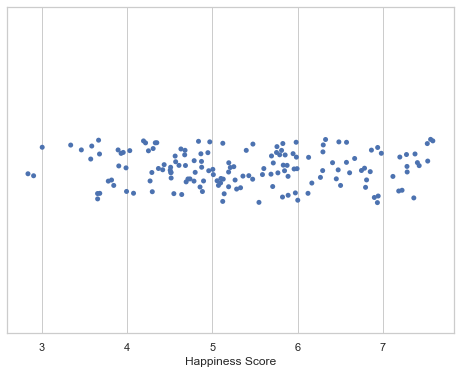

In [25]:
sns.set(style='whitegrid')
sns.stripplot(x=df['Happiness Score'])

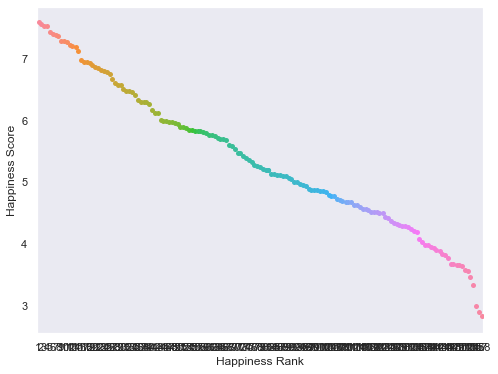

In [26]:
sns.set_style('dark')
sns.stripplot(x='Happiness Rank',y='Happiness Score',data=df)

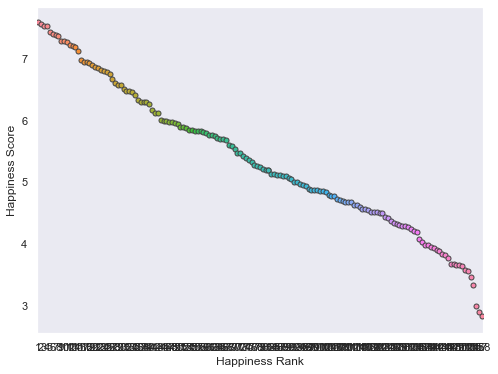

In [27]:
sns.stripplot(x='Happiness Rank',y='Happiness Score',data=df,jitter=0.05,linewidth=1)

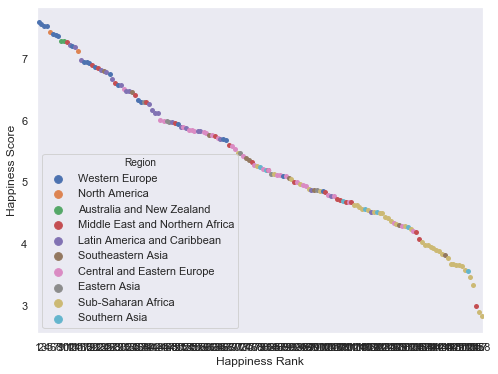

In [28]:
sns.stripplot(x='Happiness Rank',y='Happiness Score',hue='Region',data=df)

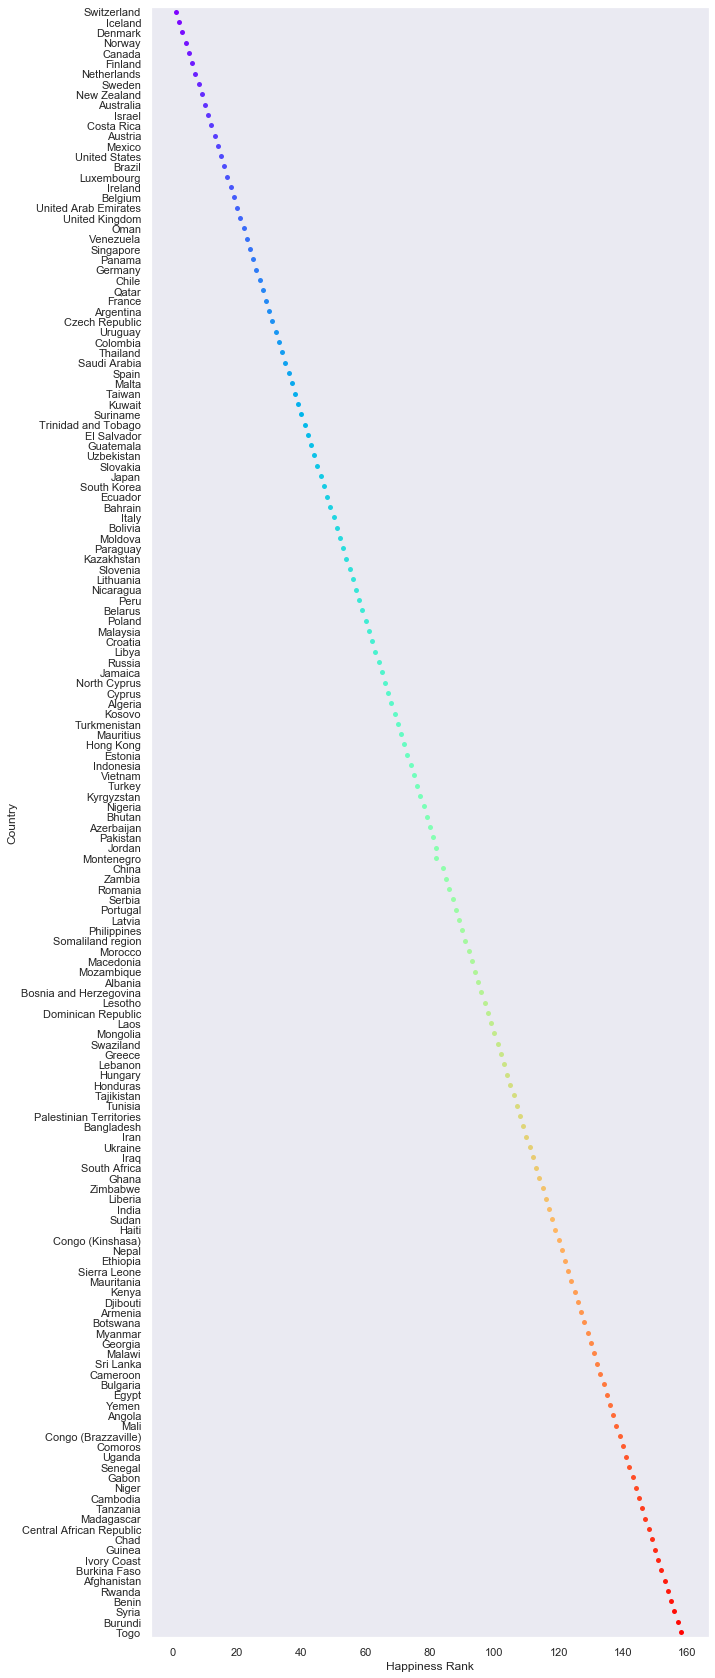

In [29]:
plt.figure(figsize=(10,30))
sns.swarmplot(x='Happiness Rank',y='Country',data=df,palette='rainbow',orient="h",size=5)

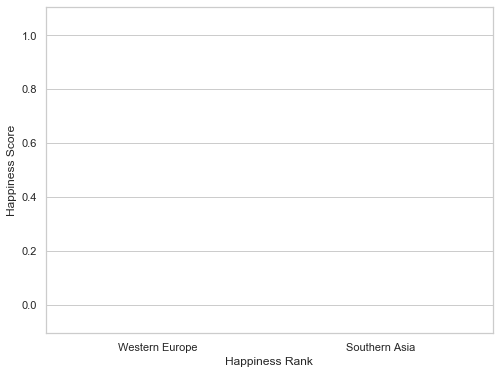

In [30]:
sns.set_style('whitegrid')
sns.stripplot(x='Happiness Rank',y='Happiness Score',order=['Western Europe','Southern Asia'],data=df,size=20,edgecolor='Blue')

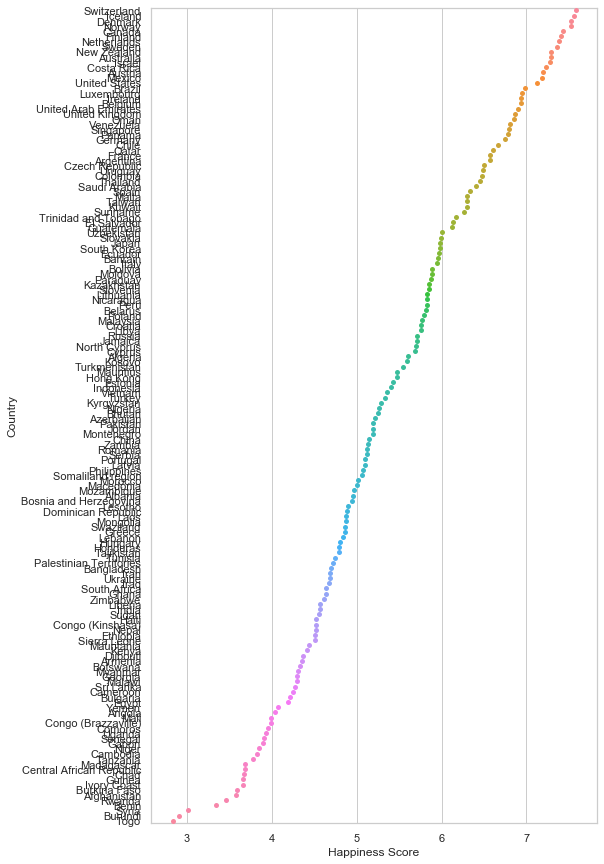

In [31]:
plt.figure(figsize=(8,15))
ax=sns.swarmplot(x='Happiness Score',y='Country',data=df)

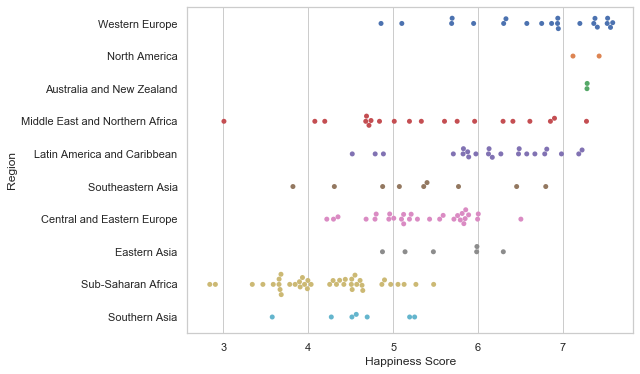

In [32]:
sns.swarmplot(x='Happiness Score',y='Region',data=df)

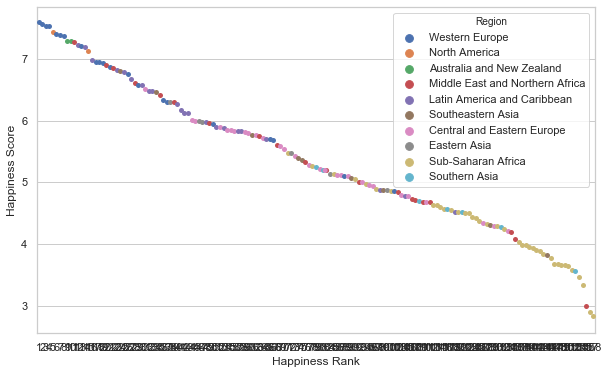

In [35]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Happiness Rank',y='Happiness Score',hue='Region',edgecolor='green',data=df,size=5,linewidth=0)

In [64]:
#sns.boxplot?

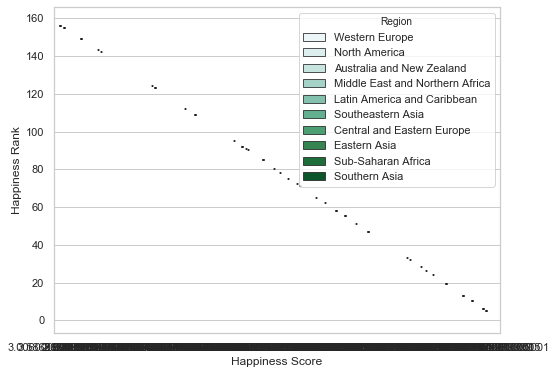

In [36]:
sns.boxplot(x='Happiness Score',y='Happiness Rank',hue='Region',palette='BuGn',data=df,fliersize=25,saturation=0.75)

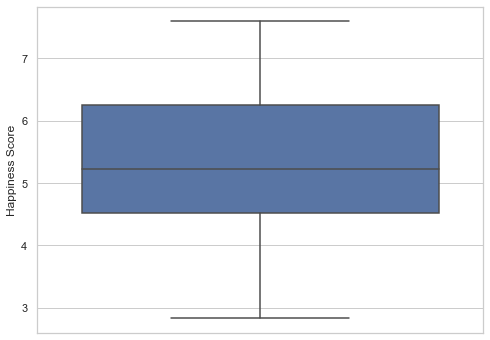

In [45]:
sns.boxplot(y='Happiness Score',data=df)

In [62]:
south=df[df['Region']=='Southern Asia']

In [63]:
south.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
108,Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
120,Nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637


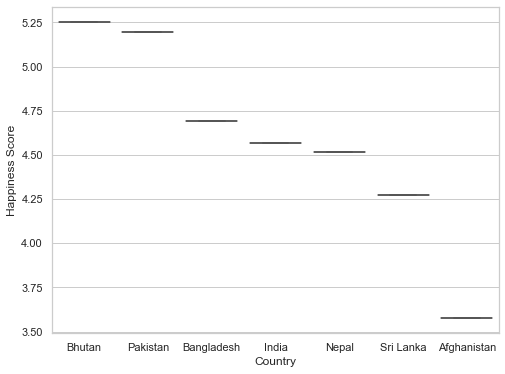

In [67]:
sns.boxplot(x='Country',y='Happiness Score',data=south,palette='cool_r')

In [68]:
#sns.violinplot?

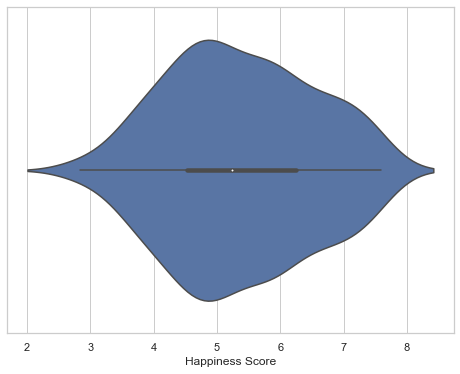

In [171]:
sns.violinplot(df['Happiness Score'])

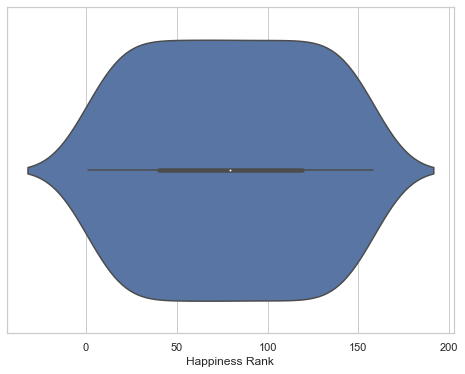

In [172]:
sns.violinplot(df['Happiness Rank'])

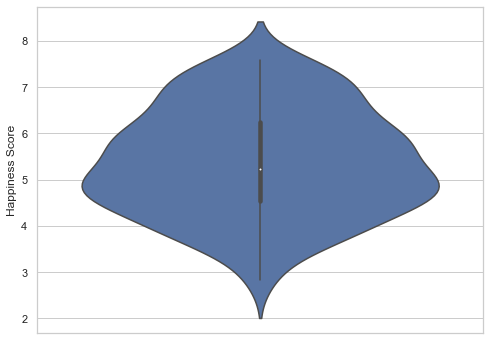

In [217]:
sns.violinplot(y='Happiness Score',data=df)

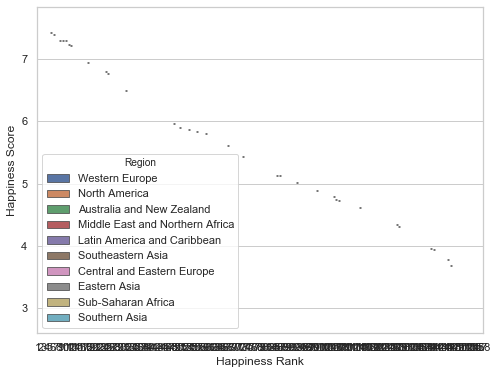

In [169]:
sns.violinplot(x='Happiness Rank',y='Happiness Score',hue='Region',data=df,inner='box',split=False,saturation=0.75,bw='scott',cut=2)

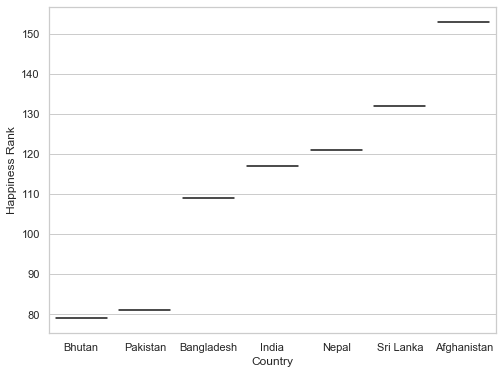

In [71]:
sns.violinplot(x='Country',y='Happiness Rank',data=south,palette='ocean_r')

In [72]:
#plt.violinplot?

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e5ba6fd808>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e5ba662ac8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e5ba6fda08>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e5ba6fda88>}

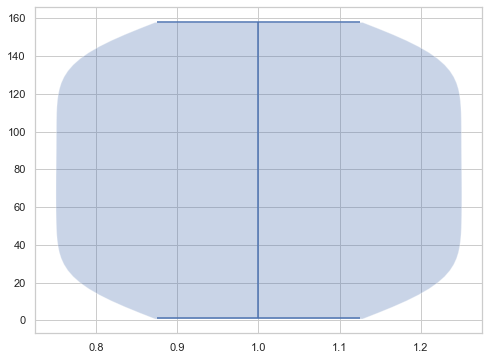

In [226]:
plt.violinplot(df['Happiness Rank'],vert=True,widths=0.5,points=50)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e5ba83d348>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e5ba80af48>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e5ba83dd08>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e5ba843bc8>}

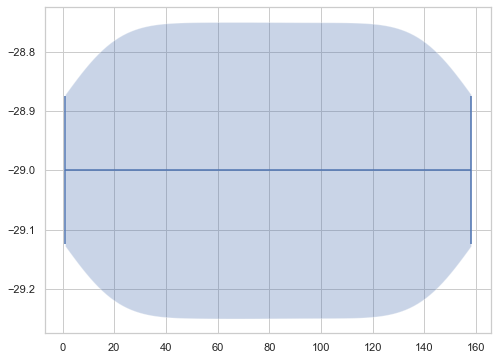

In [230]:
plt.violinplot(df['Happiness Rank'],vert=False,positions=[1-30],widths=0.5)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e5ba8a5f48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e5ba8a5fc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e5ba8adc08>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e5ba8b0b08>}

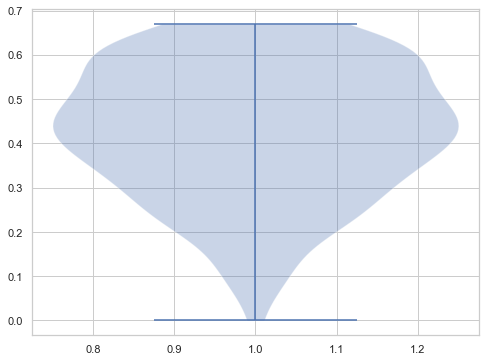

In [231]:
plt.violinplot(df['Freedom'])

In [84]:
#sns.catplot?

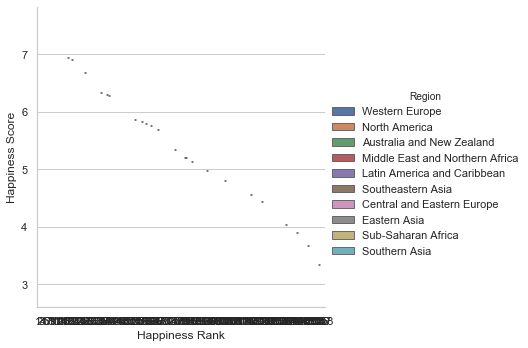

In [53]:
sns.catplot(x='Happiness Rank',y='Happiness Score',hue='Region',data=df,kind='violin')

In [54]:
south_asia=df[df['Region']=='Southeastern Asia']

In [55]:
south_asia.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
60,Malaysia,Southeastern Asia,61,5.770,0.04330,1.12486,1.07023,0.72394,0.53024,0.10501,0.33075,1.88541
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399
74,Vietnam,Southeastern Asia,75,5.360,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173


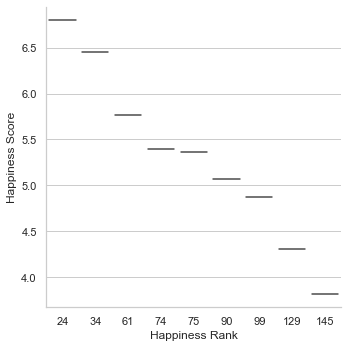

In [57]:
sns.catplot(x='Happiness Rank',y='Happiness Score',data=south_asia,kind='violin')

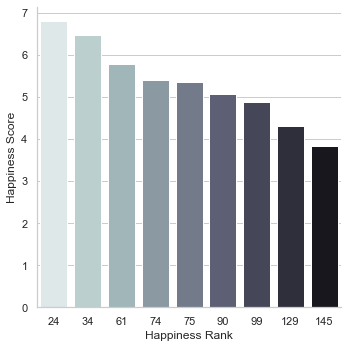

In [61]:
sns.catplot(x='Happiness Rank',y='Happiness Score',data=south_asia,kind='bar',palette='bone_r')

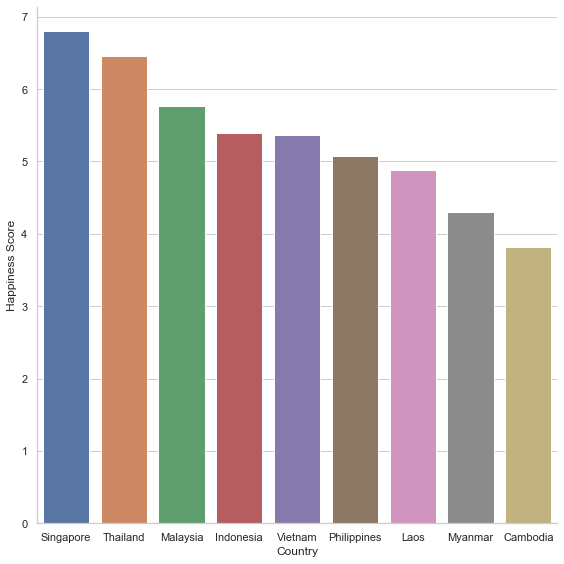

In [87]:
sns.catplot(x='Country',y='Happiness Score',data=south_asia, kind='bar',height=8)

In [75]:
#sns.jointplot?

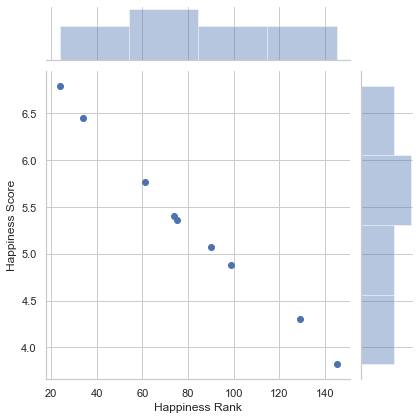

In [77]:
sns.jointplot(x='Happiness Rank',y='Happiness Score',data=south_asia)

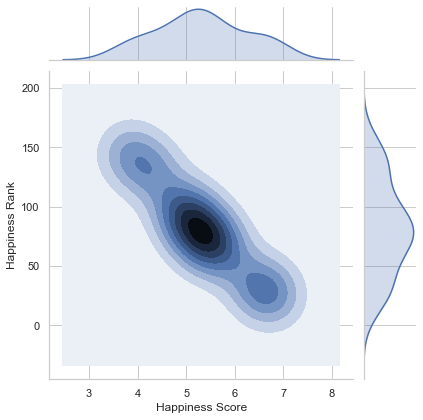

In [88]:
sns.jointplot(x='Happiness Score',y='Happiness Rank',data=south_asia,kind='kde')

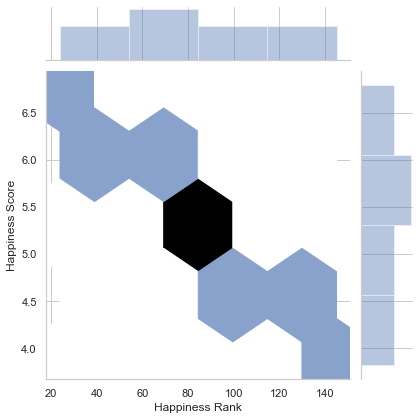

In [89]:
sns.jointplot(x='Happiness Rank',y='Happiness Score',data=south_asia,kind='hex')

In [93]:
hscore=df['Happiness Score']

In [96]:
np.percentile(hscore,100)

7.587000000000001

In [97]:
np.percentile(hscore,50)

5.2325

In [100]:
groupby_Region=df.groupby('Region')

In [101]:
groupby_Region.mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [105]:
aus_new=df[df['Region']=='Australia and New Zealand']['Happiness Score']
north_america=df[df['Region']=='North America']['Happiness Score']

In [112]:
stats.ttest_ind(aus_new,north_america)

Ttest_indResult(statistic=0.07792043515741161, pvalue=0.9449853752452694)

In [117]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [118]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [119]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [120]:
pd.get_dummies(df['Country']).head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
country=pd.get_dummies(df['Country'],drop_first=True,prefix='Country')
region=pd.get_dummies(df['Region'],drop_first=True,prefix='Region')

In [122]:
df.drop(['Country','Region'],axis=1,inplace=True)

In [123]:
df=pd.concat([df,country,region],axis=1)

In [124]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Country_Zimbabwe,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0,0,0,0,0,0,0,0,0,1
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0,0,0,0,0,0,0,0,0,1
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0,0,0,0,0,0,0,0,0,1
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0,0,0,0,0,0,0,0,0,1
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0,0,0,0,0,1,0,0,0,0


In [125]:
x=df.drop('Happiness Score',axis=1).head()
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country_Albania,...,Country_Zimbabwe,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,...,0,0,0,0,0,1,0,0,0,0


In [126]:
y=df['Happiness Score'].head()
y

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [128]:
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
predln=ln.predict(x_test)

In [130]:
print(predln)

[7.97419283 7.29009217]


In [133]:
from sklearn.externals import joblib

In [134]:
joblib.dump(ln,'happynessfile.obj')

['happynessfile.obj']